<a href="https://colab.research.google.com/github/ryakkalauncc/3162project2/blob/main/ITCS3162Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
croc_df = pd.read_csv('crocodile_dataset.csv')
croc_df.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


**Preprocessing steps taken here:**

In [ ]:
croc_df["Sex"] = croc_df["Sex"].replace("Unknown", np.nan)

In [ ]:
drop_columns = ["Observation ID", "Observer Name", "Notes", "Date of Observation"]
croc_df = croc_df.drop(columns = drop_columns)

In [ ]:
croc_df.head()

,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Country/Region,Habitat Type,Conservation Status
0,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,Belize,Swamps,Least Concern
1,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,Venezuela,Mangroves,Vulnerable
2,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,NaN,Venezuela,Flooded Savannas,Critically Endangered
3,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,Mexico,Rivers,Least Concern
4,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,NaN,India,Rivers,Vulnerable


In [ ]:
target = "Common Name"
X = croc_df.drop(columns=[target, "Scientific Name", "Family", "Genus"])
y = croc_df[target]

In [ ]:
print(X.head())
print(y.head())

   Observed Length (m)  Observed Weight (kg) Age Class   Sex Country/Region  \
0                 1.90                  62.0     Adult  Male         Belize   
1                 4.09                 334.5     Adult  Male      Venezuela   
2                 1.08                 118.2  Juvenile   NaN      Venezuela   
3                 2.42                  90.4     Adult  Male         Mexico   
4                 3.75                 269.4     Adult   NaN          India   

       Habitat Type    Conservation Status  
0            Swamps          Least Concern  
1         Mangroves             Vulnerable  
2  Flooded Savannas  Critically Endangered  
3            Rivers          Least Concern  
4            Rivers             Vulnerable  
0                   Morelet's Crocodile
1                    American Crocodile
2                     Orinoco Crocodile
3                   Morelet's Crocodile
4    Mugger Crocodile (Marsh Crocodile)
Name: Common Name, dtype: object


In [ ]:
croc_df_clean = croc_df.dropna()
print (croc_df_clean.isna)

<bound method DataFrame.isna of                                 Common Name         Scientific Name  \
0                       Morelet's Crocodile    Crocodylus moreletii   
1                        American Crocodile       Crocodylus acutus   
3                       Morelet's Crocodile    Crocodylus moreletii   
5        Mugger Crocodile (Marsh Crocodile)    Crocodylus palustris   
6                         Siamese Crocodile    Crocodylus siamensis   
..                                      ...                     ...   
994                     Morelet's Crocodile    Crocodylus moreletii   
995                  West African Crocodile       Crocodylus suchus   
996             Hall's New Guinea Crocodile        Crocodylus halli   
997  West African Slender-snouted Crocodile  Mecistops cataphractus   
998  West African Slender-snouted Crocodile  Mecistops cataphractus   

           Family       Genus  Observed Length (m)  Observed Weight (kg)  \
0    Crocodylidae  Crocodylus          

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns.tolist())

Categorical columns: ['Age Class', 'Sex', 'Country/Region', 'Habitat Type', 'Conservation Status']


In [ ]:
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [ ]:
print(X_encoded.head())
print(y.head())

   Observed Length (m)  Observed Weight (kg)  Age Class_Hatchling  \
0                 1.90                  62.0                False   
1                 4.09                 334.5                False   
2                 1.08                 118.2                False   
3                 2.42                  90.4                False   
4                 3.75                 269.4                False   

   Age Class_Juvenile  Age Class_Subadult  Sex_Male  Country/Region_Belize  \
0               False               False      True                   True   
1               False               False      True                  False   
2                True               False     False                  False   
3               False               False      True                  False   
4               False               False     False                  False   

   Country/Region_Cambodia  Country/Region_Cameroon  \
0                    False                    False   
1     

**Imports**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(800, 84)
(200, 84)


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.965
Classification Report:
                                            precision    recall  f1-score   support

                       American Crocodile       1.00      1.00      1.00        13
              Borneo Crocodile (disputed)       1.00      1.00      1.00        13
Central African Slender-snouted Crocodile       1.00      1.00      1.00        11
                    Congo Dwarf Crocodile       1.00      1.00      1.00        10
                          Cuban Crocodile       1.00      1.00      1.00        12
       Freshwater Crocodile (Johnstone's)       0.90      1.00      0.95         9
              Hall's New Guinea Crocodile       0.64      0.90      0.75        10
                      Morelet's Crocodile       1.00      1.00      1.00        13
       Mugger Crocodile (Marsh Crocodile)       1.00      1.00      1.00         9
                     New Guinea Crocodile       0.90      0.64      0.75        14
                           Nile Crocodile     

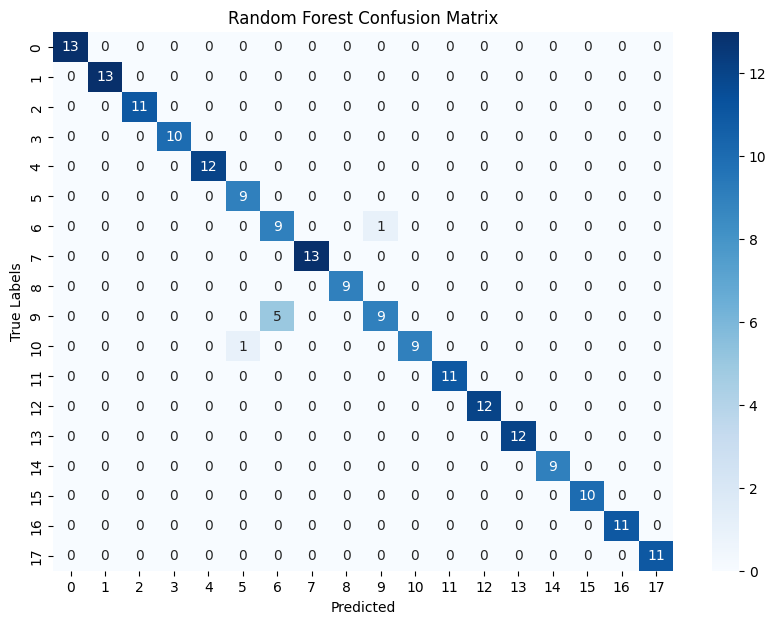

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = "d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
top_features = importances.sort_values(ascending=False).head(10)

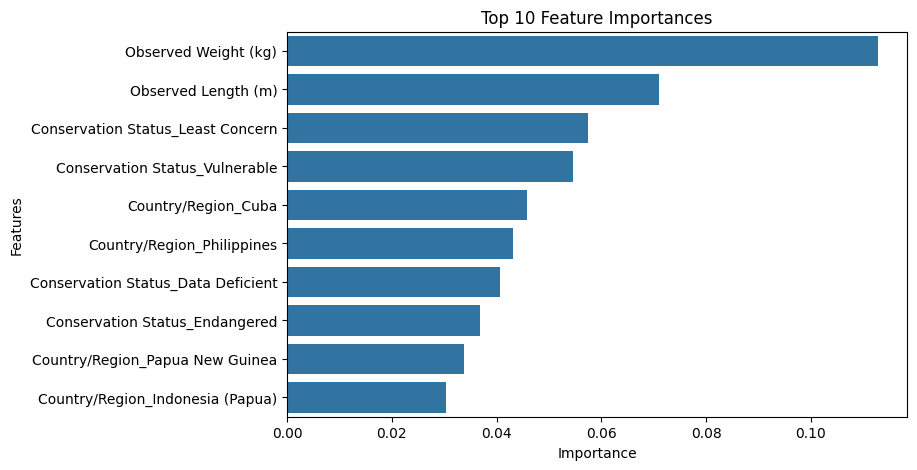

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

**Import**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameter_distance = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf'  : [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=parameter_distance, n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rf_random.fit(X_train, y_train)
print("Best Parameters: ", rf_random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [ ]:
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.975
Classification Report:
                                            precision    recall  f1-score   support

                       American Crocodile       1.00      1.00      1.00        13
              Borneo Crocodile (disputed)       1.00      1.00      1.00        13
Central African Slender-snouted Crocodile       1.00      1.00      1.00        11
                    Congo Dwarf Crocodile       1.00      1.00      1.00        10
                          Cuban Crocodile       1.00      1.00      1.00        12
       Freshwater Crocodile (Johnstone's)       1.00      1.00      1.00         9
              Hall's New Guinea Crocodile       0.69      0.90      0.78        10
                      Morelet's Crocodile       1.00      1.00      1.00        13
       Mugger Crocodile (Marsh Crocodile)       1.00      1.00      1.00         9
                     New Guinea Crocodile       0.91      0.71      0.80        14
                           Nile Crocodile     

/tmp/ipython-input-191753990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=croc_df["Common Name"], order=croc_df["Common Name"].value_counts().index, palette = "viridis")


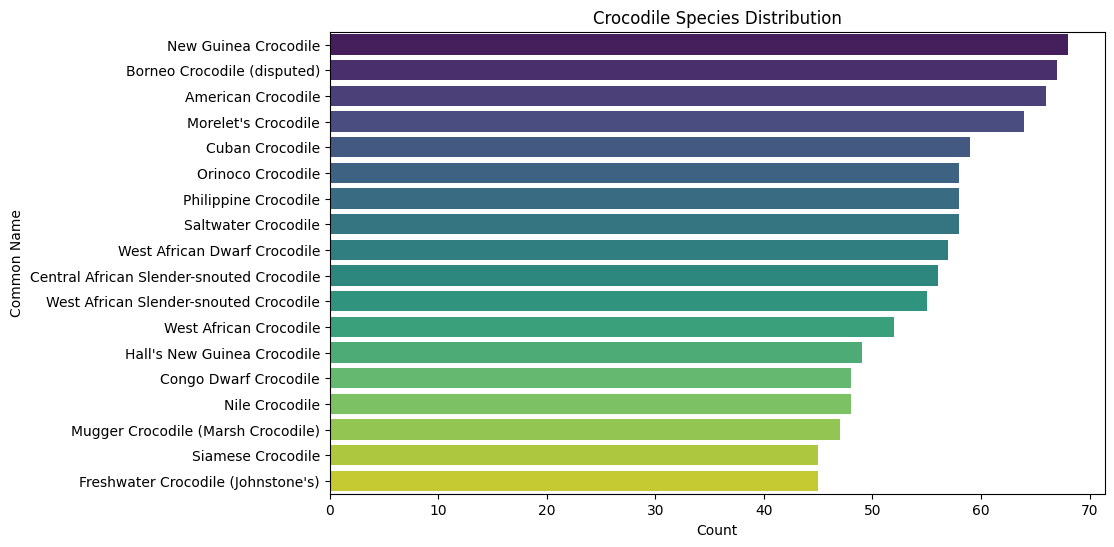

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y=croc_df["Common Name"], order=croc_df["Common Name"].value_counts().index, palette = "viridis")
plt.title("Crocodile Species Distribution")
plt.xlabel("Count")
plt.ylabel("Common Name")
plt.show()

/tmp/ipython-input-2975611230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=croc_df["Sex"], palette = "coolwarm")


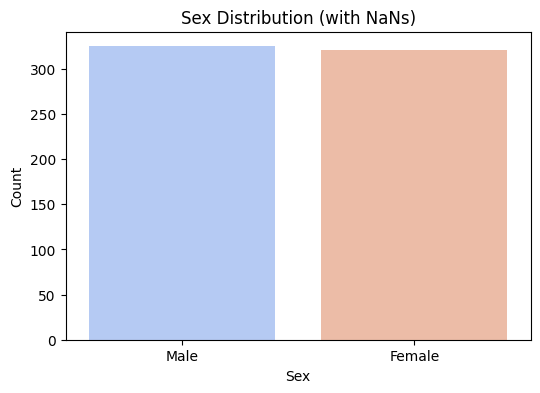

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=croc_df["Sex"], palette = "coolwarm")
plt.title("Sex Distribution (with NaNs)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-784029550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = croc_df, x= "Age Class", palette='tab10')


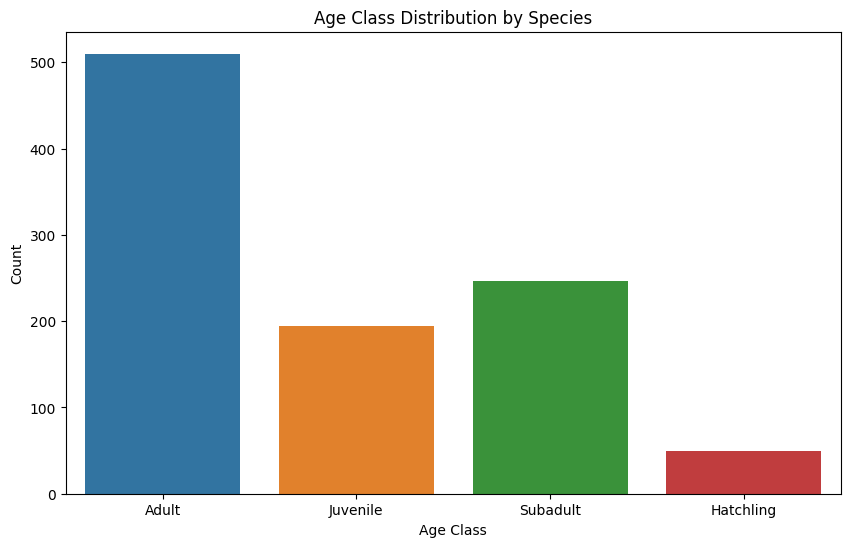

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = croc_df, x= "Age Class", palette='tab10')
plt.title("Age Class Distribution by Species")
plt.xlabel("Age Class")
plt.ylabel("Count")
plt.show()